In [46]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
df_CAN = df[df['job_country']=='Canada']
df_CAN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,"[python, sql, pytorch, pandas]","{'libraries': ['pytorch', 'pandas'], 'programm..."
59,Data Engineer,Data Engineer with Dremio Experience,"Toronto, ON, Canada",via LinkedIn,Contractor,False,Canada,2023-08-28 13:35:13,True,False,Canada,None,NaN,NaN,Iris Software Inc.,"[sql, hadoop, kubernetes]","{'libraries': ['hadoop'], 'other': ['kubernete..."
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None
85,Machine Learning Engineer,Machine Learning Engineer/Scientist High Perfo...,Anywhere,via LinkedIn,Full-time,True,Canada,2023-11-21 13:13:33,False,False,Canada,None,NaN,NaN,Haiper,"[python, pytorch]","{'libraries': ['pytorch'], 'programming': ['py..."
98,Senior Data Engineer,Senior Data Engineer (AWS),"Toronto, ON, Canada",via SmartRecruiters Job Search,Full-time,False,Canada,2023-09-01 13:42:05,True,False,Canada,None,NaN,NaN,MUFG Investor Services,"[python, aws, databricks, spark]","{'cloud': ['aws', 'databricks'], 'libraries': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785317,Data Engineer,"Data Engineer, Finance Data","Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-21 06:59:35,False,False,Canada,None,NaN,NaN,OMERS,"[sql, python, sql server, snowflake, databrick...","{'analyst_tools': ['ssrs', 'ssis'], 'cloud': [..."
785327,Data Engineer,Azure Data Engineer,"Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-25 06:18:35,False,False,Canada,None,NaN,NaN,Tiger Analytics,"[sql, azure]","{'cloud': ['azure'], 'programming': ['sql']}"
785339,Data Engineer,Data Engineering Consultant,"Montreal, QC, Canada",via BeBee Canada,Full-time,False,Canada,2023-04-11 06:11:34,True,False,Canada,None,NaN,NaN,CGI,"[sql, python, sql server, mysql, postgresql, o...","{'analyst_tools': ['tableau', 'power bi', 'loo..."
785511,Data Engineer,Data Engineer,"Montreal, QC, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-18 06:17:13,False,False,Canada,None,NaN,NaN,CGI,"[sql, nosql, python, java, cassandra, postgres...","{'cloud': ['azure', 'snowflake', 'databricks',..."


In [38]:
df_skills = df_CAN.explode('job_skills')
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,python,"{'libraries': ['pytorch', 'pandas'], 'programm..."
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,sql,"{'libraries': ['pytorch', 'pandas'], 'programm..."
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,pytorch,"{'libraries': ['pytorch', 'pandas'], 'programm..."
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,pandas,"{'libraries': ['pytorch', 'pandas'], 'programm..."
59,Data Engineer,Data Engineer with Dremio Experience,"Toronto, ON, Canada",via LinkedIn,Contractor,False,Canada,2023-08-28 13:35:13,True,False,Canada,None,NaN,NaN,Iris Software Inc.,sql,"{'libraries': ['hadoop'], 'other': ['kubernete..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785511,Data Engineer,Data Engineer,"Montreal, QC, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-18 06:17:13,False,False,Canada,None,NaN,NaN,CGI,spark,"{'cloud': ['azure', 'snowflake', 'databricks',..."
785511,Data Engineer,Data Engineer,"Montreal, QC, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-18 06:17:13,False,False,Canada,None,NaN,NaN,CGI,airflow,"{'cloud': ['azure', 'snowflake', 'databricks',..."
785511,Data Engineer,Data Engineer,"Montreal, QC, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-18 06:17:13,False,False,Canada,None,NaN,NaN,CGI,kafka,"{'cloud': ['azure', 'snowflake', 'databricks',..."
785643,Data Scientist,Analyste,Canada,via Trabajo.org,Full-time,False,Canada,2023-11-07 07:04:58,False,False,Canada,None,NaN,NaN,Altus Group,word,"{'analyst_tools': ['word', 'excel']}"


In [39]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1215,sql,Data Engineer,3794
949,python,Data Engineer,3567
108,azure,Data Engineer,2217
98,aws,Data Engineer,2030
1171,spark,Data Engineer,1948
...,...,...,...
1322,tidyr,Machine Learning Engineer,1
559,jquery,Data Analyst,1
1327,trello,Data Analyst,1
810,openstack,Data Scientist,1


In [40]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Senior Data Engineer']

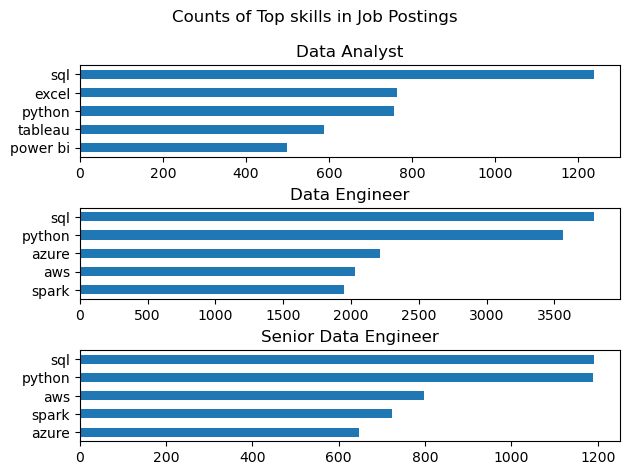

In [41]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title = job_title, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')

fig.suptitle('Counts of Top skills in Job Postings', fontsize=12)
fig.tight_layout(h_pad=0.5)
plt.show()

In [42]:
df_job_count = df_CAN['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_count

,job_title_short,jobs_total
0,Data Engineer,5828
1,Data Analyst,2365
2,Data Scientist,1825
3,Senior Data Engineer,1776
4,Software Engineer,1254
5,Business Analyst,1109
6,Senior Data Scientist,589
7,Machine Learning Engineer,566
8,Senior Data Analyst,435
9,Cloud Engineer,282


In [43]:
df_skills_perc = pd.merge(df_skills_count, df_job_count, how='left', on='job_title_short')
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,3794,5828,65.099520
1,python,Data Engineer,3567,5828,61.204530
2,azure,Data Engineer,2217,5828,38.040494
3,aws,Data Engineer,2030,5828,34.831846
4,spark,Data Engineer,1948,5828,33.424846
...,...,...,...,...,...
1480,tidyr,Machine Learning Engineer,1,566,0.176678
1481,jquery,Data Analyst,1,2365,0.042283
1482,trello,Data Analyst,1,2365,0.042283
1483,openstack,Data Scientist,1,1825,0.054795


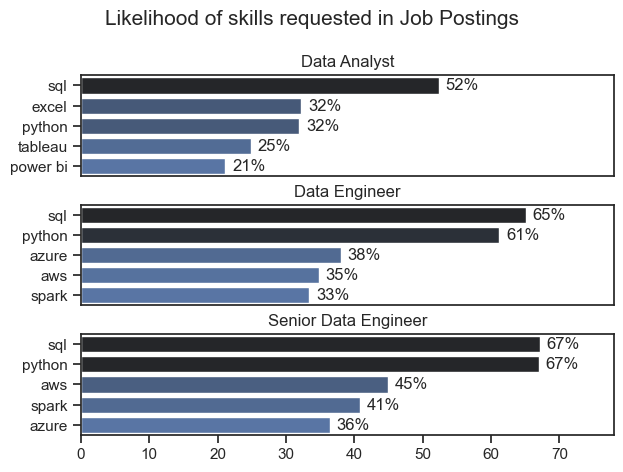

In [60]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title = job_title, legend=False)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i!= len(job_titles) -1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skills requested in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [52]:
df_plot

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
7,sql,Senior Data Engineer,1192,1776,67.117117
8,python,Senior Data Engineer,1190,1776,67.004505
18,aws,Senior Data Engineer,798,1776,44.932432
24,spark,Senior Data Engineer,724,1776,40.765766
26,azure,Senior Data Engineer,646,1776,36.373874
